In [189]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from torchvision import datasets, models, transforms

In [5]:
pictures_path = Path(r"C:\embeded\face-embeddings")

In [6]:
def list_files(path):
    return [fn for fn in path.iterdir() if fn.is_file()]

In [7]:
gaba_fl   = list_files(pictures_path / 'gaba')
maciek_fl = list_files(pictures_path / 'maciek') 
mama_fl   = list_files(pictures_path / 'mama')

In [196]:
face_recognition_model = "C:\\embeded\\facerecognition_sfg.onnx"
recognizer = cv2.FaceRecognizerSF.create(face_recognition_model, "")

In [9]:
def get_embeddings(recognizer,filelist):
    return [recognizer.feature( cv2.imread(str(fn)) ) for fn in filelist]

In [10]:
gaba_emb = get_embeddings(recognizer,gaba_fl)

In [11]:
maciek_emb = get_embeddings(recognizer,maciek_fl)

In [12]:
mama_emb = get_embeddings(recognizer,mama_fl)

In [13]:
for e in gaba_emb:
    print(np.linalg.norm(e[0]))

9.264785
7.7364154
10.893741
9.467084
4.9677477
6.3004885
10.1633005
10.813304
8.7713
9.532555
11.002688
7.0429444
8.137749
8.37078
7.444586
8.479169
7.220359
9.806144
4.6312428
7.895382
7.5353875


## cosine similarity

In [14]:
recognizer.match(gaba_emb[0], gaba_emb[1], cv2.FaceRecognizerSF_FR_COSINE)

0.7260038698514109

In [15]:
def cos_similarity(x,y):
    lx =  np.linalg.norm(x[0])
    nx = x[0]/lx
    ly =  np.linalg.norm(y[0])
    ny = y[0]/ly
    return np.dot(nx,ny)

In [16]:
cos_similarity(gaba_emb[0], gaba_emb[1])

0.72600394

## L2 similarity

In [160]:
recognizer.match(gaba_emb[0], gaba_emb[1], cv2.FaceRecognizerSF_FR_NORM_L2)

0.7402649962734291

In [158]:
def l2_similarity(x,y):
    diff = x - y
    return np.linalg.norm(diff)

In [159]:
l2_similarity(gaba_emb[0], gaba_emb[1])

0.74026495

In [20]:
def plot_vectors(vectors):
    n = len(vectors)
    plt.quiver( [0]*n, [0]*n, *list(zip(*vectors)), range(n) )

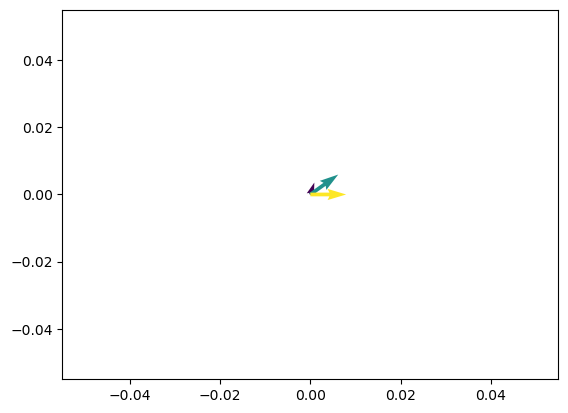

In [21]:
vectors=[[1,3], [7,5], [9,0]]
plot_vectors(vectors)

In [22]:
def normalize(x):
    l = np.linalg.norm(x)
    return x / l

In [24]:
x,y = [1,2],[4,7]
lx,ly = np.linalg.norm(x),np.linalg.norm(y)
print(lx,ly)
ly/lx

2.23606797749979 8.06225774829855


3.6055512754639887

In [25]:
def plot_vectors_as_points(vectors):
    plt.scatter( *list(zip(*vectors)))

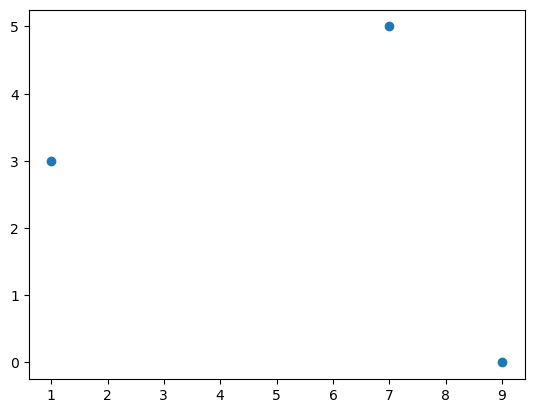

In [26]:
vectors=[[1,3], [7,5], [9,0]]
plot_vectors_as_points(vectors)

In [27]:
def l1_norm(x,y):
    x = np.array(x)
    y = np.array(y)
    return np.sum( np.abs(x-y) )

In [28]:
l1_norm([1,3], [7,5])

8

In [182]:
#gaba_emb
def make_similarity_matrix(emb1):
    n = len(emb1)
    sim = np.eye(n)
    for i,e1 in enumerate(emb1):
        for j in range(i):
            e2 = emb1[j]
            s = cos_similarity(e1,e2)
            sim[i,j] = sim[j,i] = s
    return sim


def make_similarity_matrix_ex(emb1,similarity_fn):
    n = len(emb1)
    sim = np.eye(n)
    for i,e1 in enumerate(emb1):
        for j in range(i):
            e2 = emb1[j]
            s = similarity_fn(e1,e2)
            sim[i,j] = sim[j,i] = s
    return sim


def make_similarity_matrix_2(emb1,emb2):
    n1 = len(emb1)
    n2 = len(emb2)
    sim = np.zeros((n1,n2))
    for i,e1 in enumerate(emb1):
        for j,e2 in enumerate(emb2):
            s = cos_similarity(e1,e2)
            sim[i,j] = s
    return sim

def plot_similarity_heatmap(sim,title):
    n = sim.shape[0]
    f = plt.figure()
    ax = f.add_subplot(111)
    p = ax.imshow(sim, cmap='hot', interpolation='nearest')
    ax.set_xticks(range(0,n))
    ax.set_yticks(range(0,n))
    f.colorbar(p)
    f.suptitle(title)
    plt.show()

In [175]:
def similarity_range(sim_arr):
    return np.min(sim_arr), np.max( sim_arr[np.where(sim_arr != 1.0)] )

## Cosine similarity matrix : Gaba

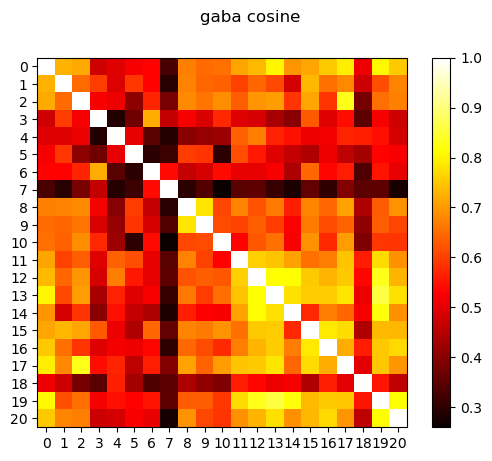

In [173]:
gaba_sim_cos = make_similarity_matrix(gaba_emb)
plot_similarity_heatmap(gaba_sim_cos,'gaba cosine')

In [197]:
similarity_range(gaba_sim_cos)

(0.2595064640045166, 0.860489010810852)

In [ ]:
np.

## L2 Similarity matrix: Gaba

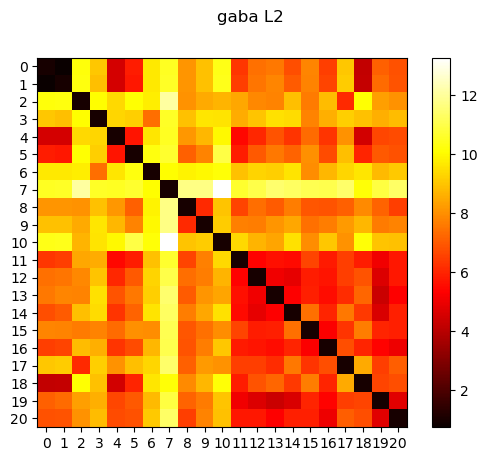

In [174]:
gaba_sim_L2 = make_similarity_matrix_ex(gaba_emb, l2_similarity)
plot_similarity_heatmap(gaba_sim_L2, 'gaba L2')

In [198]:
similarity_range(gaba_sim_L2)

(0.7402649521827698, 13.275425910949707)

In [188]:
gaba_sim_L2

array([[ 1.        ,  0.74026495, 10.1989212 ,  9.03100967,  4.55556202,
         5.84170437,  9.66642666, 10.52648926,  8.13389015,  8.91761398,
        10.37741375,  6.37021494,  7.4348197 ,  7.59215832,  6.78774071,
         7.79688406,  6.50052357,  9.03350735,  4.20833492,  7.11468601,
         6.81442261],
       [ 0.74026495,  1.        , 10.27385998,  8.90714836,  4.55864954,
         5.76545811,  9.6662569 , 10.56260014,  8.13134956,  8.92242527,
        10.39474678,  6.48915529,  7.53491879,  7.80157614,  7.01638985,
         7.7774024 ,  6.61028099,  9.15396881,  4.24727631,  7.32170343,
         6.89874029],
       [10.1989212 , 10.27385998,  1.        , 10.0478611 ,  9.39171696,
        10.13941574,  9.77779484, 12.07450962,  8.06801605,  8.50782299,
         8.68611526,  8.4332056 ,  7.85347271,  7.78218937,  8.88603592,
         7.63465643,  8.8586731 ,  6.09103966, 10.09276962,  8.30372524,
         8.08048725],
       [ 9.03100967,  8.90714836, 10.0478611 ,  1.        

## Cosine similarity matrix : Maciek

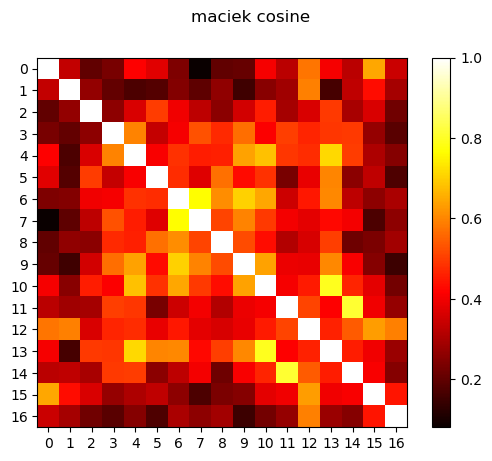

In [177]:
maciek_cos_sim = make_similarity_matrix(maciek_emb)
plot_similarity_heatmap(maciek_cos_sim,'maciek cosine')

## L2 similarity matrix : Maciek

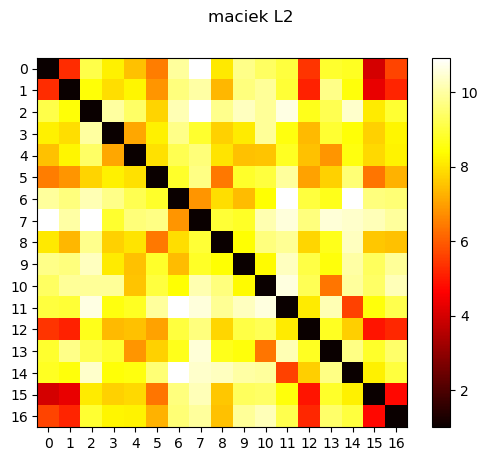

In [178]:
maciek_L2_sim = make_similarity_matrix_ex(maciek_emb, l2_similarity)
plot_similarity_heatmap(maciek_L2_sim, 'maciek L2')

## Cosine similarity matrix : Mama

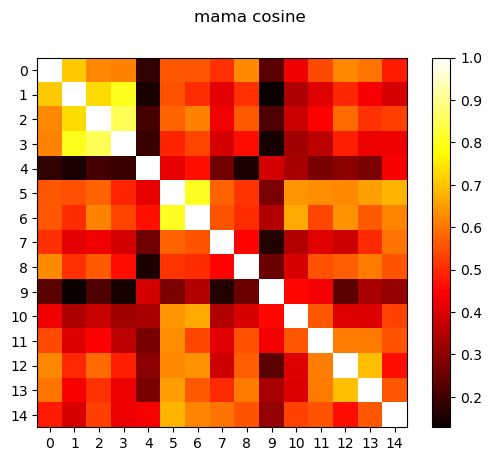

In [179]:
mama_sim_cosine = make_similarity_matrix(mama_emb)
plot_similarity_heatmap(mama_sim_cosine,'mama cosine')

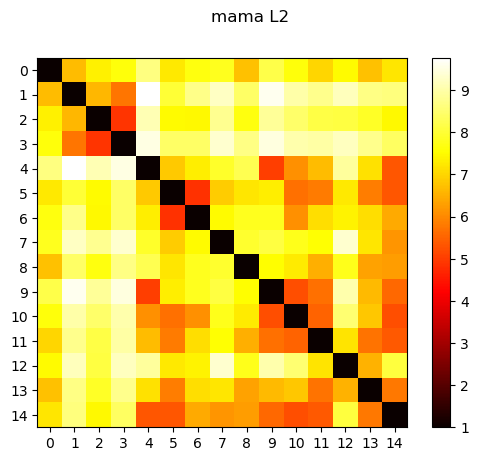

In [181]:
mama_sim_L2 = make_similarity_matrix_ex(mama_emb, l2_similarity)
plot_similarity_heatmap(mama_sim_L2, 'mama L2')

## L2 similarity matrix : Mama

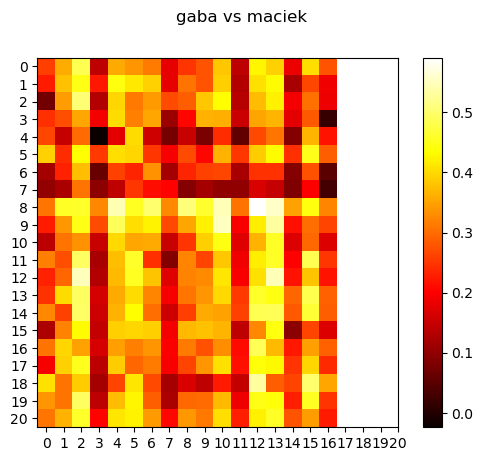

In [42]:
gaba_vs_maciek_sim = make_similarity_matrix_2(gaba_emb,maciek_emb)
plot_similarity_heatmap(gaba_vs_maciek_sim,'gaba vs maciek')

In [43]:
similarity_range(gaba_vs_maciek_sim)

(-0.024284105747938156, 0.5910729765892029)

In [44]:
len(gaba_fl),len(maciek_fl)

(21, 17)